In [49]:
import pandas as pd
import plotly.express as px
from script import test_stationarity
from script import check_required_differencing
from script import arima_model
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [50]:
df_dam = pd.read_csv('./ResOpsUS/ResOpsUS/attributes/reservoir_attributes.csv')
df_dam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DAM_ID                 678 non-null    int64  
 1   DAM_NAME               678 non-null    object 
 2   STATE                  678 non-null    object 
 3   AGENCY_CODE            678 non-null    object 
 4   LONG                   678 non-null    float64
 5   LAT                    678 non-null    float64
 6   TIME_SERIES_START      678 non-null    object 
 7   TIME_SERIES_END        677 non-null    object 
 8   INCONSISTENCIES_NOTED  3 non-null      object 
dtypes: float64(2), int64(1), object(6)
memory usage: 47.8+ KB


In [51]:
df_dam[df_dam['DAM_NAME'].str.lower() == 'hoover']

,DAM_ID,DAM_NAME,STATE,AGENCY_CODE,LONG,LAT,TIME_SERIES_START,TIME_SERIES_END,INCONSISTENCIES_NOTED
244,610,Hoover,Nevada,BOR,-114.735006,36.018191,4/1/34,1/28/21,NaN


In [52]:
dam_id = df_dam[df_dam['DAM_NAME'].str.lower() == 'hoover']['DAM_ID'].values[0]

In [53]:
df_hoover = pd.read_csv(f'./ResOpsUS/ResOpsUS/time_series_all/ResOpsUS_{dam_id}.csv')


In [54]:
df_hoover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         31715 non-null  object 
 1   storage      30561 non-null  float64
 2   inflow       0 non-null      float64
 3   outflow      31715 non-null  float64
 4   evaporation  0 non-null      float64
 5   elevation    31407 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.5+ MB


In [55]:
df_hoover['date'] = pd.to_datetime(df_hoover['date'], format='%Y-%m-%d')

In [56]:
for i in df_hoover.columns[1:]:
    df_hoover[i] = pd.to_numeric(df_hoover[i], errors='coerce')

In [ ]:
fig = px.line(df_hoover, x='date', 
              y='storage', 
              title=f'{'storage'} of Hoover dam') 
fig.update_layout(xaxis_title='Time', yaxis_title='Stage [ft]')
fig.write_html('Storage of Hoover dam.html')

In [24]:
df_hoover.head()

,date,storage,inflow,outflow,evaporation,elevation
0,1934-04-01,NaN,NaN,166.503,NaN,NaN
1,1934-04-02,NaN,NaN,171.883,NaN,NaN
2,1934-04-03,NaN,NaN,165.370,NaN,NaN
3,1934-04-04,NaN,NaN,161.123,NaN,NaN
4,1934-04-05,NaN,NaN,156.875,NaN,NaN


In [29]:

# Create subplots
variables_of_interest = ['storage', 'outflow', 'elevation']
n_subplots = len(variables_of_interest)
fig = make_subplots(rows=n_subplots, 
                    cols=1, 
                    shared_xaxes=True, 
                    subplot_titles=variables_of_interest)

# Add traces for each variable
for i, var in enumerate(variables_of_interest):
    fig.add_trace(go.Scatter(x=df_hoover['date'], y=df_hoover[var], mode='lines', name=var), row=i+1, col=1)

# Update layout
fig.update_layout(height=200 * n_subplots, title_text="Hoover dam in over time", showlegend=True)

# Show figure
fig.write_html('hoover_dam_over_time.html')


In [33]:
df_hoover.fillna(method='bfill', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_26996\3989360626.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [34]:
test_stationarity(df_hoover['storage'], 'kpss')
test_stationarity(df_hoover['storage'], 'adfuller')

c:\Users\DELL\Desktop\renewables_by_artur\renewables\script\test_stationarity.py:17: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




Test: kpss
Test Statistic: 4.0061
p-value: 0.0100
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739

Test: adfuller
Test Statistic: -3.4520
p-value: 0.0093
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567



In [35]:
check_required_differencing(df_hoover, 'storage')

------- Differencing required for stationarity (trend)-------
Differencing required (adf): 0
Differencing required (kpss): 1
Differencing required (pp): 1
------- Differencing required for stationarity (seasonality) -------
Differencing required for seasonality (OCSB): 0
Differencing required for seasonality (CH): 0


In [36]:
model = arima_model(df_hoover['storage'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=334725.698, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=331995.256, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=332879.511, Time=3.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=334723.702, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=330037.058, Time=1.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=326380.425, Time=9.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=326415.717, Time=6.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=326381.693, Time=24.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=326380.219, Time=7.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=331539.704, Time=5.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=326378.219, Time=3.62 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=331537.706, Time=2.82 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=326413.717, Time=3.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=326379.170, Time=14.51 sec
 AR

In [44]:
predictions = model.predict(n_periods=100)

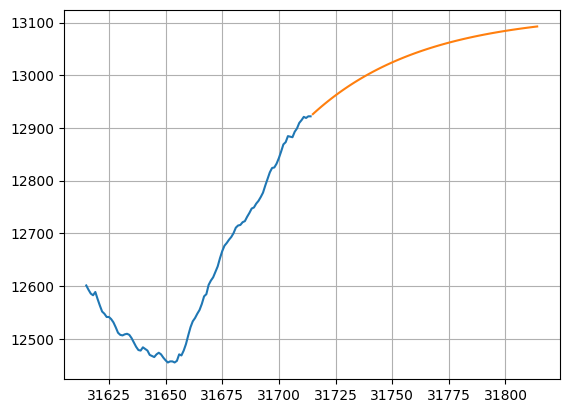

In [45]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(df_hoover['storage'][-100:])
plt.plot(np.arange(len(df_hoover['storage']), len(df_hoover['storage'])+len(predictions)),predictions.values,'-')
plt.grid('on')

In [57]:
start = pd.to_datetime('2014-05-01')
end = pd.to_datetime('2020-03-01')

In [61]:
df_hoover = df_hoover[df_hoover['date'].between(start, end)].reset_index(drop=True).loc[:,['date','storage', 'outflow', 'elevation']]

In [62]:
df_hoover.to_csv('hoover_dam_between_May2014_March2020.csv', index=False)